# Guía 5 - Modelos estacionarios y modelos no estacionarios

## Algunas consideraciones

Continuaremos el estudio de los modelos estocáticos básicos. Las familias de modelos AR(p) y, como veremos, los modelos MA(q) y ARMA(p,q) son estacionarios. Abordamos primero estas familias.

## Modelos estacionarios

Los modelos estacionarios son adecuados en los casos que la serie residual no contiene tendencias o ciclos estacionales. 

Cuando la media y la varianza de una serie $\{x_t\}$ son constantes en el tiempo y la autocovarianza (o autocorrelación) solo dependen de la separación temporal (*lags*), decimos que la serie es estacionaria de segundo orden. 

Si asumimos que nuestra serie temporal es una realización de un proceso estacionario, entonces podemos ajustarle un modelo estacionario. En estos casos, resulta de interés el proceso de descomposición o de regresión de la serie cuyos residuos pueden resultar en una realización de una serie de errores estacionaria.  

## Modelos de media móvil

La serie $\{x_t\}$ es un proceso de media móvil de orden MA(q) si 

$$x_t = w_t + \beta_1 w_{t-1} + \cdots + \beta_q w_{t-q}$$

donde  $\{w_t\}$ es un ruido blanco con media nula y varinza $\sigma^2$. Los $\beta_i$ son los parámetros del modelo y $\beta_q$ debe ser distinto de cero.

Aplicando el operador de traslación temporal, el modelo MA(q) puede expresarse de manera compacta como un polinomio $\Phi$ en el operador $\mathbf{B}$

$$x_t = \Phi_q (\mathbf{B}) w_t = w_t + \beta_1 w_{t-1} + \cdots + \beta_q w_{t-q}$$


### Características


a. La media es cero porque es la suma de términos, todos los cuales son de media nula.  
b. La varianza es $\sigma^2(1 + \beta_1^2 + \cdots + \beta_q^2)$ porque todos los términos tienen igual varianza y son mutuamente independientes.  
c. La función de autocorrelación para $k\ge0$ está dada por  

$$\mathrm{acf}(k) = \left\{ \begin{array}{cr}
1 & k=0\\
\sum_{i=0}^{q-k}\beta_i\beta_{i+k} / \sum_{i=0}^q \beta_i^2 & k=1, \ldots, q\\
0 & k>q\\
\end{array} \right.$$

d. Un proceso MA(q) es invertible si puede ser formulado como un proceso autorregresivo infinito. Ejemplo, el proceso MA(1) $x_t=(1-\beta \mathbf{B})w_t$ puede ser expresado como  

$$w_t = \left(1-\beta \mathbf{B}\right)^{-1} x_t = x_t + \beta x_{t-1} + \beta^2 x_{t-2} + \cdots$$

si se satisface que $|\beta|<1$ para garantizar la convergencia.  

e. En general, un proceso MA(q) será invertible si todas las ráices de $\Phi(\mathrm{B})$ exceden la unidad en valor absoluto.  


## Ejercicios

1. Simular un proceso MA(3) con $\beta_1= 0.7, \beta_2=0.5, \beta_3=0.2$.  
    a. Obtener la serie sintética para un proceso MA(3).  
    b. ¿Es necesario probar que la serie resultante es estacionaria?¿Por qué?   
    c. Obtener el gráfico para la función de autocorrelación y para la función de autocorrelación parcial.  
    d. Encontrar el modelo MA(q) que mejor ajusta a la serie sintética empleando el criterio de información de Akaike (AIC). ¿Coincide el orden hallado con el valor del *lag* a partir del cual la función de autocorrelación se anula?    

2. Simular un proceso MA(3) con $\beta_1= -0.7, \beta_2=0.5, \beta_3= -0.2$.  
    a. Obtener la serie sintética para un proceso MA(3).   
    b. Obtener el gráfico para la función de autocorrelación y para la función de autocorrelación parcial.  
    c. Encontrar el modelo MA(q) que mejor ajusta a la serie sintética empleando el criterio de de información de Akaike (AIC)  

  
 

### Ayudas para el ejercicio 1

Comenzamos importando, como es habitual, las bibliotecas de `numpy`, `pandas` y de gráficos `matplotlib`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




Comenzaremos generando una serie sintética para un proceso MA(3) con ayuda de la biblioteca `statsmodels.tsa.arima_process`

In [2]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_process import ArmaProcess

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
np.random.seed(12345)
arparams = np.array([])
maparams = np.array([0.7, 0.5, 0.2])
ar_params = np.r_[1, -arparams] # add zero-lag and negate
ma_params = np.r_[1, maparams] # add zero-lag

n_samples = 250

# Se puede genera una TS con
#y = arma_generate_sample(
#    ar=ar_params, 
#    ma=ma_params, 
#    nsample=n_samples, 
#    scale=1            # Standard deviation of the noise
#)
# o también
arma_process = ArmaProcess(ar_params, ma_params)
arma_sample = arma_process.generate_sample(n_samples, scale=1.0)


y = pd.Series(arma_sample, index=pd.date_range(start='2026-01-01 00:00:00', periods=n_samples, freq='1h'))

La expresión para la serie con los coeficientes elegidos es

$$x_t = w_t + 0.7 w_{t-1} + 0.5 w_{t-2} + 0.2 w_{t-3}$$

y su representación gráfica es

Text(0, 0.5, 'Value')

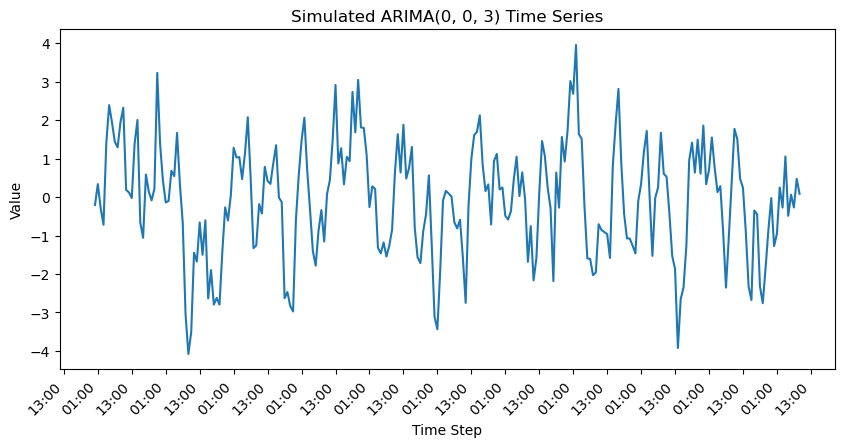

In [4]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y)
# Use DateFormatter to show only the hour (%H)
hour_form = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(hour_form)

# Optional: Adjust locator to place ticks at the start of each year (or at intervals)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))

# Optional: Improve label presentation (e.g., rotation)
fig.autofmt_xdate(rotation=45, ha='right')
ax.set_title("Simulated ARIMA(0, 0, 3) Time Series")
ax.set_xlabel("Time Step")
ax.set_ylabel("Value")

Representamos las funciones de autocorrelación  y autocorrelación parcial. Por construcción, esperamos que la función de autocorrelación no tenga valores distintos de cero con significancia estadística después del lag 3. 

Text(0.5, 0, 'Lags')

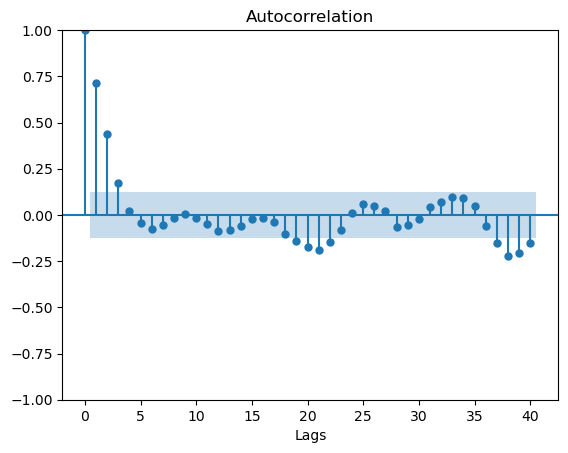

In [5]:
plot_acf(y, lags=40, bartlett_confint=False)
plt.xlabel('Lags')

Text(0.5, 0, 'Lags')

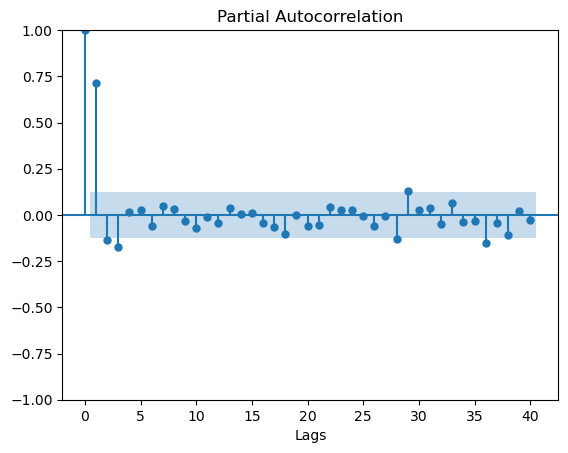

In [6]:
plot_pacf(y, lags=40)
plt.xlabel('Lags')

Ensayamos el ajuste al modelo esperado con la clase `ARIMA`. Notamos que a diferencia de `sklearn`, luego de ajustar el modelo con el método `fit()`, obtenemos otra clase denominada `ARIMAResult` sobre la que extraeremos las predicciones y otras propiedades.

In [7]:
model = ARIMA(y, order=(0, 0, 3), trend='n')
res = model.fit()
print('Sumary: ', res.summary())
print('Params: ', model.params_complete)

Sumary:                                 SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -353.556
Date:                Tue, 03 Feb 2026   AIC                            715.111
Time:                        12:47:22   BIC                            729.197
Sample:                    01-01-2026   HQIC                           720.780
                         - 01-11-2026                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7845      0.064     12.171      0.000       0.658       0.911
ma.L2          0.5943      0.071      8.329      0.000       0.454       0.734
ma.L3          0.2308      0.062      3.707

El método `predict()` nos da las prediciones en los pasos de tiempo cargados incialmenente en la definición del modelo `ARIMA` (no hace falta pasar la variable endógena como pensaríamos de `sklearn`. Asimismo, se puede pronosticar con el método `forecast(n)`  n-pasos delante. Ciertamente, al solo coniderar el ruido, el pronóstico converge a su media (en este caso es cero). 

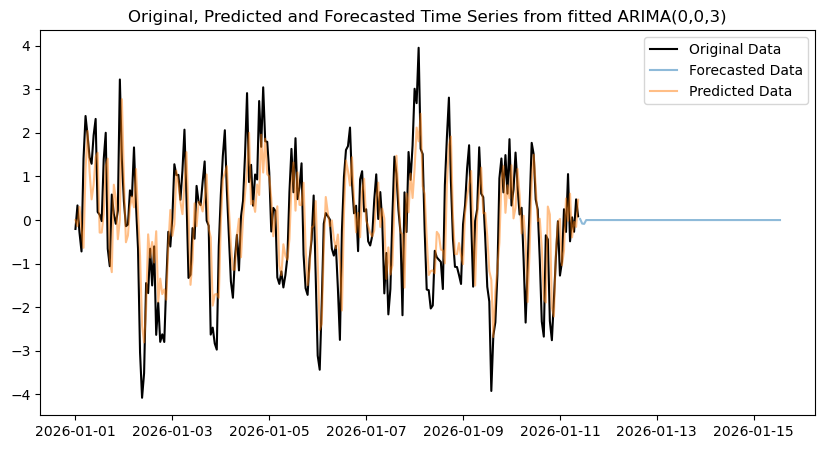

In [8]:
# Predicted values with fitted model
predicted_series = res.get_prediction().predicted_mean

# forecast data starting from the end of the original time series
# Forecast 100 new observations
n_forecasts = 100
forecasted_series = res.get_forecast(n_forecasts).predicted_mean

# Plot original and simulated data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y,label='Original Data', color='k')
ax.plot(forecasted_series, label='Forecasted Data', color='C0', alpha=0.5)
ax.plot(predicted_series, label='Predicted Data', color='C1', alpha=0.5)
ax.set_title("Original, Predicted and Forecasted Time Series from fitted ARIMA(0,0,3)")
plt.legend()

Si no conocemos el orden del modelo MA(q), para hallar el $q$ que logra el mejor ajuste utilizaremos el criterio de información de Akaike que penaliza la abundancia de parámetros 

AIC = -2 log-likelihood + 2 cantidad-de-parámetros

El ajuste de parámetros se realiza maximizando el logaritmo de la verosimilitud (*likelihood*). La verosimilitud expresa la probabilidad de obtener los datos registrados dado el modelo (con sus parámetros). 

Planteamos una iteración para valores crecientes de $q$ y nos quedaremos con aquel modelo que obtenga el menor AIC.

In [9]:
q_max = 6

aic_array = np.empty(q_max)
mse_array = np.empty(q_max)

for q in range(q_max):
    model = ARIMA(y, order=(0, 0, q), trend='n')
    res = model.fit()
    aic_array[q] = res.aic
    mse_array[q] = res.mse
    if q == 0:
        aic_min = res.aic
        q_best = 0
    else:
        if aic_min > res.aic:
            aic_min = res.aic
            q_best = q

print(f'Best order: (0, 0, {q_best})')


Best order: (0, 0, 3)


Vemos que se ha reobtenido el orden propuesto inicialmente. Ciertamente, si utilizamos como criterio de selección el RMSE, su resultado disminuye con el incremento en el número de variables (mayor número de grados de libertad). Por eso se necesita un criterio que penliza el uso de una mayor cantidad de atributos.

In [10]:
print(mse_array)

[2.10099329 1.29118558 1.04588229 0.98770012 0.9858346  0.98009655]


## Modelos mixtos 

La serie $\{x_t\}$ es un proceso autoregresivo de media móvil de orden ARMA(p,q) si 

$$x_t = \alpha_1 x_{t-1} + \cdots + \alpha_p x_{t-p} + w_t + \beta_1 w_{t-1} + \cdots + \beta_q w_{t-q}$$

donde  $\{w_t\}$ es un ruido blanco con media nula y varinza $\sigma^2$. Los $\alpha_i, \beta_i$ son los parámetros del modelo y $\alpha_p, \beta_q$ deben ser distintos de cero.

Aplicando el operador de traslación temporal, el modelo ARMA(p,q) puede expresarse de manera compacta en el operador $\matbf{B}$ como

$$\Theta_p (\mathbf{B}) x_t = \Phi_q (\mathbf{B}) w_t$$


### Características


a. El modelo AR(p) es un caso especial de ARMA(p,0)  
b. El modelo MA(q) es un caso especial de ARMA(0,q)  
b. El proceso será estacionario cuando todas las raíces de $\Theta$ excedan la unidad en valor absoluto.  
d. El proceso será invertible cuando todas las raíces de $\Phi$ excedan la unidad en valor absoluto.  
e. Criterio de *parsimonia*: un modelo ARMA suele ser más eficiente (requiere una menor cantidad de parámetros) que un único modelo AR o MA.  
f. Redundancia de parámetros: cuando $\Theta$ y $\Phi$ comparten un factor común (una misma raíz de sus polinomios carcterísticos) el modelo estacionario puede ser simplificado. Por ejemplo, el modelo  

$$\left(1 - \frac{1}{2}\mathbf{B}\right) \left(1 - \frac{1}{3}\mathbf{B}\right) x_t = \left(1 - \frac{1}{2}\mathbf{B}\right) w_t$$

puede ser reescrito como

$$\left(1 - \frac{1}{3}\mathbf{B}\right) x_t =  w_t$$

## Ejercicios

3. Simular un proceso ARMA(1,1) con $\alpha_1=0.6, \beta_1= 0.5$.  
    a. Obtener la serie sintética para un proceso ARMA(1,1).  
    b. Probar que la serie resultante es estacionaria.   
    c. Obtener el gráfico para la función de autocorrelación y para la función de autocorrelación parcial.  
    d. Encontrar el modelo ARMA(p,q) que mejor ajusta a la serie sintética empleando el criterio de de información de Akaike (AIC). Plantear un doble bucle en los parámetros $p,q$ para la búsqueda del modelo que minimiza el AIC.   


## Modelos no estacionarios

Muchas series temporales no son estacionarias porque contienen tendencias o incluyen efectos estacionales. Sin embargo, mediante la *diferenciación* pueden transformarse en series estacionarias. Sin embargo, la serie diferenciada necesita ser agregada (o integrada) en un paso final para recuperar la serie en la variable original. A esto se lo denomina modelo autoregresivo de media móvil integrado de orden ARIMA(p,d,q).  El proceso ARIMA puede extenderse para incluir términos estacionales conduciendo al proceso SARIMA(p,d,q)(P,D,Q,m).

## Definición

Una serie temporal $\{x_t\}$ sigue un proceso ARIMA(p,d,q) si la diferencia $d$-ésima de $\{x_t\}$ es un proceso ARMA(p,q). Aplicando el operador de traslación temporal, el modelo ARIMA(p,d,q) puede expresarse de manera compacta en el operador $\mathbf{B}$ como

$$\Theta_p (\mathbf{B}) \left(1-\mathbf{B}\right)^d x_t = \Phi_q (\mathbf{B}) w_t$$

### Ejemplos

1. Buscamos re-escribir el modelo $x_t = x_{t-1} + w_t + \beta w_{t-1}$ en términos del operador de traslación temporal $\mathbf{B}$. Para esto, agrupamos los términos de la siguiente manera $x_t - x_{t-1} = w_t + \beta w_{t-1}$ que en términos de $\mathbf{B}$ resulta ser  $\left(1-\mathbf{B}\right)x_t = \left(1 + \beta \mathbf{B}\right)w_t$. Así, vemos que se trata de un proceso ARIMA(0,1,1).
2. Buscamos re-escribir el modelo $x_t = \alpha x_{t-1} + x_{t-1} -\alpha x_{t-2} + w_t$. Reordenando y factorizando se obtiene $\left(1-\alpha \mathbf{B}\right) \left(1-\mathbf{B}\right) x_t = w_t$. Así, vemos que se trata de un proceso ARIMA(1,1,0). Es importante enfatizar que no podría tratarse de un ARIMA(2,0,0) o AR(2) ya que $\left(1-\mathbf{B}\right)$ tiene una raíz en 1 y el modelo AR(2) no sería estacionario.

## Ejercicios

4. Simular un proceso ARIMA cuya expresión es $x_t = 0.5 x_{t-1} + x_{t-1} - 0.5 x_{t-2} + w_t + 0.3 w_{t-1}$  
    a. Obtener la serie sintética para el proceso ARIMA.  
    b. Probar que la serie original no es estacionaria. Probar que la serie resultante de diferenciar es estacionaria.   
    c. Obtener el gráfico para la función de autocorrelación y para la función de autocorrelación parcial.  
    d. Encontrar el modelo ARIMA(p,d,q) que mejor ajusta a la serie sintética empleando el criterio de de información de Akaike (AIC). Elegir $d$ por la cantidad de diferenciaciones que conducen a una serie estacionaria. Plantear un doble bucle en los parámetros $p,q$ para la búsqueda del modelo que minimiza el AIC.

## Incorporando los factores estacionales

Un modelo estacional SARIMA toma diferencias retrasadas con una cantidad de pasos igual a la de estaciones ($s$) para remover los efectos estacionales. Aplicando el operador de traslación temporal, el modelo SARIMA(p,d,q)(P,D,Q,s) puede expresarse de manera compacta en el operador $\mathbf{B}$ como

$$\Theta_P (\mathbf{B}^s) \Theta_p (\mathbf{B}) \left(1-\mathbf{B}^s\right)^D \left(1-\mathbf{B}\right)^d x_t = \Phi_Q (\mathbf{B}^s) \Phi_q (\mathbf{B})w_t$$

### Ejemplos

a. Consideramos una serie con tendencias estocásticas e infleuncias estacionales $x_t = x_{t-1} + \alpha x_{t-12} - \alpha x_{t-13} + w_t$. Reordenando y factorizando se obtiene $(1-\alpha \mathbf{B}^{12})(1-\beta \mathbf{B})x_t=w_t$ o también $\Theta_1(\mathbf{B}^{12})(1-\mathbf{B})x_t=w_t$ que representa un modelo SARIMA(0,1,0)(1,0,0, 12).  
b. Un modelo estacional por trimestres es $x_t=(1-\beta \mathbf{B}^4)w_t = w_t - \beta w_{t-4}$. Si, además incorpora una tendencia estocástica entonces resulta $x_t = x_{t-1} + w_t - \beta w_{t-4}$ resumido en un proceso SARIMA(0,1,0)(0,0,1,4).

```{admonition} Ayuda
**Ayuda**: Diferenciando con un lag $s$ también removerá las medias y tendencias lineales. Será a elección si se incluye una diferenciación con $s$ igual a 1.
```


## Ejercicios

5. Analizar la serie histórica de niveles (alturas en metros) registrados en la estación hidrométrica Corrientes de la Red Hidrológica Nacional consultada desde [Sistema Nacional de Información Hídrica](https://snih.hidricosargentina.gob.ar/Filtros.aspx). En particular, nos quedaremos con los promedios **mensuales**. 
    a. Obtener la serie de promedios mensuales de niveles hidrométricos para la estación Corrientes.
    b. Obtener y representar las series originales de niveles medios mensuales, su primera diferencia y su doceava diferencia.
    c. Chequear si las series original y diferenciadas son estacionarias.
    d. Obtener los gráfico para las funciones de autocorrelación y para las funciiones de autocorrelación parcial.  
    d. Encontrar el modelo SARIMA(p,d,q)(P,D,Q,s) que mejor ajusta a la serie histórica empleando el criterio de de información de Akaike (AIC). Elegir $d$ y/o $s$ por la cantidad de diferenciaciones que conducen a una serie estacionaria. Plantear una iteración sobre todas las combinaciones posibles de parámetros $p,q,P,Q$ para la búsqueda del modelo que minimiza el AIC. Chequear que la serie de los errores es compatible con un ruido blanco.
6. Analizar la serie de demanda eléctrica diaria. Proponer un modelo SARIMA(p,d,q)(P,D,Q,s) con $s=7$ (frecuencia semanal). Evaluar el número de diferenciaciones para que la serie sea estacionaria. Buscar los mejores parámetros con el criterio de información de Akaike. Chequear que la serie de errores represente una realización de un ruido blanco. 

## Ayuda para el ejercicio ...

Comenzamos cargando la base de datos de alturas. Notamos que algunas fechas cuentan con varias lecturas por lo que forzamos a un valor medio diario.

In [11]:
corrientes = pd.read_excel('Data/niveles_Corrientes.xlsx', skiprows=1)
print('Nombre de las columnas:', corrientes.columns)

Nombre de las columnas: Index(['Fecha y Hora', 'Altura [m]'], dtype='object')


In [12]:
# Construímos la serie de alturas diarias
# coerce convierte a np.nan datos que no pueden ser transformados a float
# resample nos asegura que si hay más de un dato diario, se quedará con el promedio
# asfreq nos completa las fechas, eventualmente con np.nan si no hay dato
dti = pd.to_datetime(corrientes['Fecha y Hora'], format='%d/%m/%Y %H:%M')
niveles = pd.Series(pd.to_numeric(corrientes['Altura [m]'], errors='coerce', downcast='float').values, index=dti)
niveles_diarios = niveles.resample('1d', origin='1910-01-01').mean().asfreq('D')

In [13]:
print(niveles_diarios[0:5])

Fecha y Hora
1910-01-01    1.96
1910-01-02    2.02
1910-01-03    2.09
1910-01-04    2.20
1910-01-05    2.30
Freq: D, dtype: float32


In [14]:
# Chequeamos si hay muchos meses con un faltante importante de datos
suma_nans = niveles_diarios.isna().resample('ME').sum().asfreq('ME')
suma_nans[suma_nans > 10]

Fecha y Hora
1911-01-31    31
1911-02-28    28
2025-08-31    31
dtype: int64

Como detectamos problemas en los meses de enero de 1911, febrero de 1911 y agosto de 2025, vamos a recortar la serie entre 1912 y 2024.

In [15]:
niveles_diarios = niveles_diarios['1912-01-01':'2024-12-31']

Finalmente, nos interesa recuperar los promedios de altura mensuales para estudiar si corresponden a un proceso integrado autoregresivo de media móvil con efectos estacionales y, eventualmente, ajustar un modelo SARIMA(p,d,q)(P,D,Q,s).

In [16]:
# Nos quedamos con los promedios mensuales
niveles_mensuales = niveles_diarios.resample('ME').mean().asfreq('ME')
niveles_mensuales.index.rename('Year-Month', inplace=True)
niveles_mensuales.rename('Altura [m]', inplace=True)

Year-Month
1912-01-31    6.753871
1912-02-29    6.071724
1912-03-31    6.501935
1912-04-30    5.224667
1912-05-31    4.035161
                ...   
2024-08-31    1.276290
2024-09-30    1.040500
2024-10-31    1.281935
2024-11-30    1.362000
2024-12-31    3.392903
Freq: ME, Name: Altura [m], Length: 1356, dtype: float32

Construimos un dataframe con las series de niveles mensuales, su primera difrencia, y su difrencia doceava. Anticipamos la presencia de efectos estacionales e intentamos ver si podemos controlarlos con la técnica de difernciación. 

> :bulb: **Nota**: Cuando analizamos los promedios anuales de niveles hidrométricos, no notamos la existencia de una tendencia. Esto conduce a pensar que bastaría tomar la diferncia doceava para transformar la serie en una serie estacionaria.
>



In [17]:
df_mensuales=pd.DataFrame({'Altura':niveles_mensuales,
                           'D1Altura':niveles_mensuales.diff(periods=1),
                           'D12Altura':niveles_mensuales.diff(periods=12)})

Separamos en datos de entrenamiento y prueba. Realizamos un gráfico para ayudarnos a interpretar el proceso.

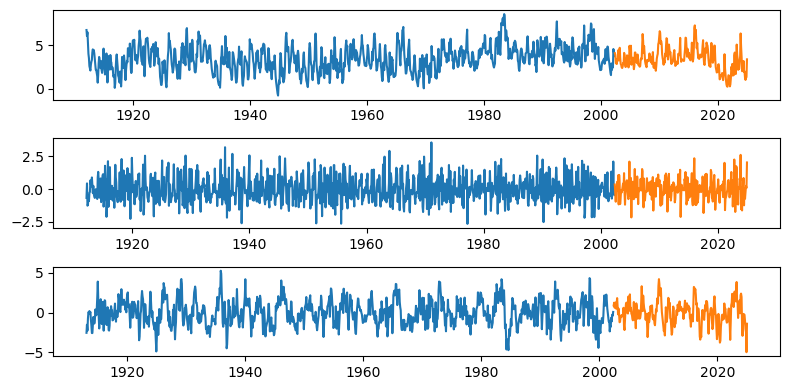

In [18]:
nm_train = df_mensuales[:int(0.8*df_mensuales.shape[0])]
nm_test = df_mensuales[int(0.8*df_mensuales.shape[0]):]

fig, ax = plt.subplots(df_mensuales.columns.size, 1, figsize=(8,4))
for i, col in enumerate(df_mensuales.columns):
    ax[i].plot(nm_train[col], c='C0', label='Train')
    ax[i].plot(nm_test[col], c='C1', label='Test')
plt.tight_layout()

Además, definimos una función que ayuda en la lectura e intepretación de la prueba de DIckey-Fuller aumentada.

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

Realizamos la prueba de Dickey-Fuller aumentado para confirmar que la serie es estacionaria.

In [20]:
for i, col in enumerate(df_mensuales.columns):
    print(f'ADF test for column: {col}')
    adf_test(nm_train[col].dropna())
    print('---------------\n')

ADF test for column: Altura
Results of Dickey-Fuller Test:
Test Statistic                   -4.331118
p-value                           0.000392
#Lags Used                       22.000000
Number of Observations Used    1061.000000
Critical Value (1%)              -3.436528
Critical Value (5%)              -2.864268
Critical Value (10%)             -2.568222
dtype: float64
---------------

ADF test for column: D1Altura
Results of Dickey-Fuller Test:
Test Statistic                -1.120336e+01
p-value                        2.215592e-20
#Lags Used                     2.200000e+01
Number of Observations Used    1.060000e+03
Critical Value (1%)           -3.436534e+00
Critical Value (5%)           -2.864270e+00
Critical Value (10%)          -2.568224e+00
dtype: float64
---------------

ADF test for column: D12Altura
Results of Dickey-Fuller Test:
Test Statistic                -9.755383e+00
p-value                        7.814864e-17
#Lags Used                     2.200000e+01
Number of Obs

Si bien la prueba de Dickey-Fuller no descartaría el uso de la serie original, por inspección notamos la presencia de oscilaciones. Este efecto será más marcado en la función de autocorrelación. Más aún, esta misma prueba con la diferncia doceava muestra un resultado mucho más fuerte para considerar como estacionaria a la serie difernciada. En realidad, es de esperar la presencia de efectos estacionales con un período de 12 meses por tratarse de un proceso gobernado por el ciclo astonómico anual.

Ahora representamos las funciones de autocorrelación y autocorrelación parcial.

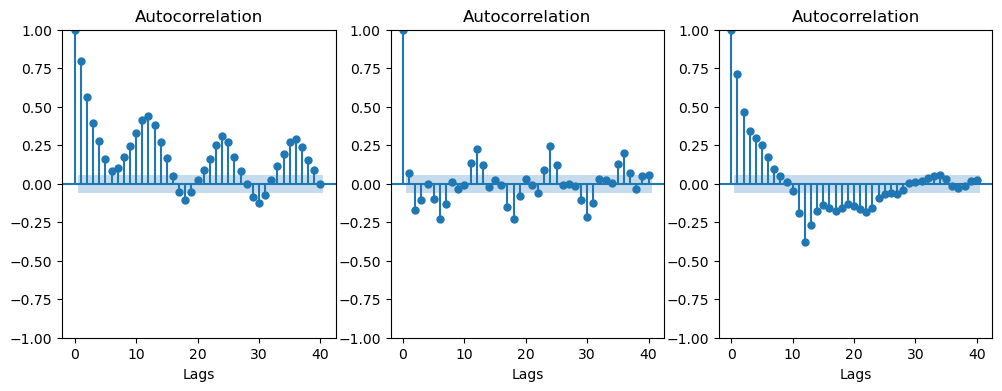

In [21]:
fig, ax = plt.subplots(1,df_mensuales.columns.size, figsize=(12,4))
for i, col in enumerate(df_mensuales.columns):
    plot_acf(nm_train[col].dropna(), lags=40, bartlett_confint=False, ax=ax[i])
    ax[i].set_xlabel('Lags')

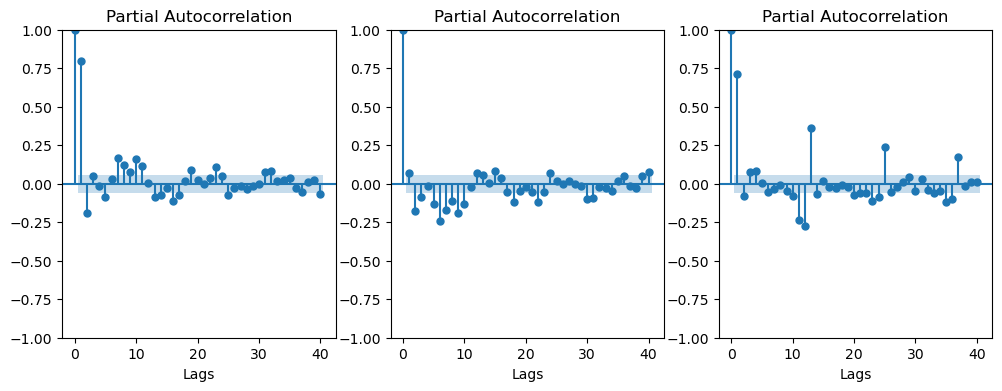

In [22]:
fig, ax = plt.subplots(1,df_mensuales.columns.size, figsize=(12,4))
for i, col in enumerate(df_mensuales.columns):
    plot_pacf(nm_train[col].dropna(), lags=40, ax=ax[i])
    ax[i].set_xlabel('Lags')


Observamos que la función de autocorrelación parcial registra un valor alto con significacnia estadística solo para el primer lag, sugiriendo un modelo ARIMA().


La serie es estacionaria... probamos si se puede ajustar con un modelo ARIMA(p,d,q)(P,D,Q,s)

Vamos a iterar sobre todas las combinaciones $p,q,P,Q$ de manera de quedarnos con aquel modelo que logra el AIC más bajo. Asumimos $d=0$ ya que no vemos indicios de una tendencia y $D=1$ con $s=12$ para incluir los efectos estacionales. En general, por el criterio de *parsimonia* se itera sobre valores pequeños.

In [23]:
from itertools import product
from tqdm.notebook import tqdm # make your loops show a smart progress meter

max_order = 2 # Podemos ir por 3 pero los acuerdos no mejoran significativamente
ps = qs = Ps = Qs = range(max_order)
aic_final_df = pd.DataFrame({'p':[], 'q':[], 'P':[], 'Q':[], 'AIC':[]})

for p,q,P,Q in tqdm(product(ps,qs,Ps,Qs)): # Cartesian product of the input iterables.
    try:
        model = ARIMA(nm_train['Altura'], order=(p, 0, q), seasonal_order=(P,1,Q,12), trend='n')
    except:
        continue
    res = model.fit()
    aic_df = pd.DataFrame({'p':[p], 'q':[q], 'P':[P], 'Q':[Q], 'AIC':[res.aic]})
    aic_final_df = pd.concat([aic_final_df, aic_df])

            

aic_final_df.sort_values(by='AIC')

0it [00:00, ?it/s]

,p,q,P,Q,AIC
0,1.0,1.0,0.0,1.0,2629.841790
0,1.0,1.0,1.0,1.0,2630.562487
0,1.0,0.0,0.0,1.0,2636.074412
0,1.0,0.0,1.0,1.0,2636.571553
0,1.0,1.0,1.0,0.0,2945.746295
0,1.0,0.0,1.0,0.0,2950.092517
0,0.0,1.0,1.0,1.0,2957.359529
0,0.0,1.0,0.0,1.0,2969.700845
0,1.0,1.0,0.0,0.0,3241.168305
0,0.0,1.0,1.0,0.0,3244.389665


Representamos la serie de alturas (promedio mensual) de la estación hidrológica Corrientes y las comparamos con las predicciones del modelo SARIMA() tanto con datos de entrenamiento como de prueba.

Best order: 
p         1.00000
q         1.00000
P         0.00000
Q         1.00000
AIC    2629.84179
Name: 0, dtype: float64


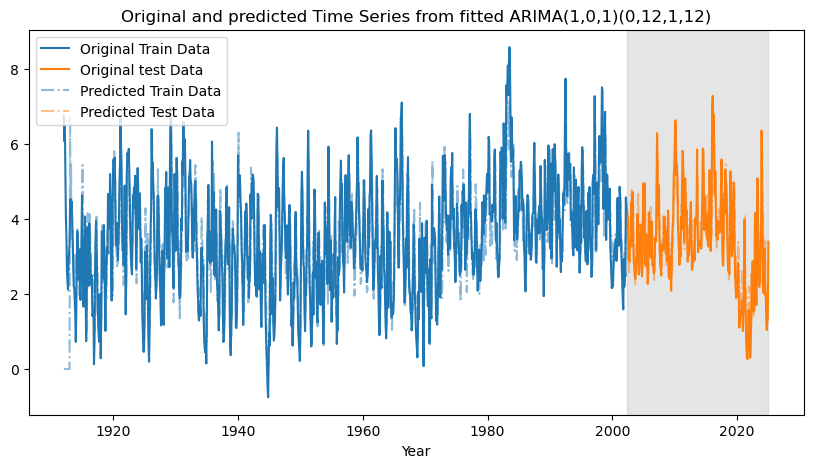

In [24]:
best_order = aic_final_df.iloc[np.argmin(aic_final_df['AIC']),:]
print('Best order: ')
print(best_order)

model = ARIMA(nm_train['Altura'], order=(best_order['p'], 0, best_order['q']),
              seasonal_order=(best_order['P'],1,best_order['Q'],12), trend='n')
res_train = model.fit()
# Predicted values with fitted model
train_predicted_series = res_train.get_prediction().predicted_mean

res_test = res_train.extend(nm_test['Altura'])
test_predicted_series = res_test.fittedvalues

# Plot original and simulated data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(nm_train['Altura'],label='Original Train Data', color='C0')
ax.plot(nm_test['Altura'],label='Original test Data', color='C1')
ax.plot(train_predicted_series, label='Predicted Train Data', color='C0', alpha=0.5, linestyle='-.')
ax.plot(test_predicted_series, label='Predicted Test Data', color='C1', alpha=0.5, linestyle='-.')
ax.axvspan(nm_test['Altura'].index[0],nm_test['Altura'].index[-1],color='#808080', alpha=0.2)
ax.set_title(f'Original and predicted Time Series from fitted ARIMA\
({best_order['p']:.0f},0,{best_order['q']:.0f})({best_order['P']:.0f},12,{best_order['Q']:.0f},12)')
ax.set_xlabel('Year')
plt.legend()

Para mayor confianza en la elección del orden del modelo, podemos explorar los residuos esperando que sean una realización de una variable aletoria independiente e identicamente distribuídas. Podemos tomar el resiudo directamente `res_train.resid` o usar `plot_diagnostic()` con la cual el paquete `stastmodel` nos facilita el análisis cualitativo.

Así, una vez encontrado el modelo que mejor se ajusta, el correlograma de los residuos debe verificarse como ruido blanco.

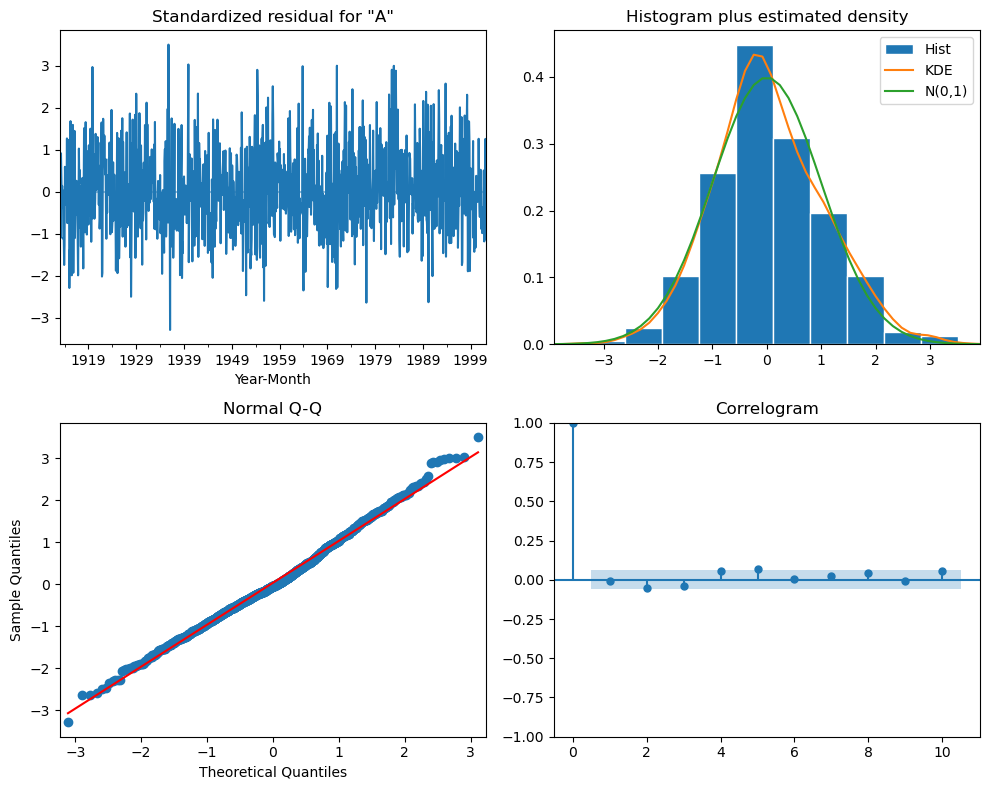

In [25]:
res_train.plot_diagnostics(figsize=(10,8))
plt.tight_layout()

Finalmente, evaluamos el desempeño del modelo en entrenamiento y prueba, y lo comparamos con un modelo base que la predicción toma el valor registrado en el mes inmediato anterior.

In [26]:
print(f'ARMA Model Train Data RMSE: {np.sqrt(res_train.mse):.3f}')
print(f'ARMA Model Test Data RMSE: {np.sqrt(res_test.mse):.3f}')

ARMA Model Train Data RMSE: 0.939
ARMA Model Test Data RMSE: 0.766


In [27]:
lm_train = nm_train['Altura'].shift(1)
lm_test = nm_test['Altura'].shift(1)
mse_train = np.mean((lm_train - lm_train.mean())**2)
mse_test = np.mean((lm_test - lm_test.mean())**2)

print(f'Last Month Model Train Data RMSE: {np.sqrt(mse_train):.3f}')
print(f'Last Month Test Data RMSE: {np.sqrt(mse_test):.3f}')

Last Month Model Train Data RMSE: 1.488
Last Month Test Data RMSE: 1.270
